# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', 1000)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**ПРЕОБРАЗОВАНИЕ ДАННЫХ**

**Dummy-variables:**

* sex = male? - 1
* famsize = Greater than 3? - 1
* parents status = together? - 1
* address = urban? - 1
* school = MS? - 1
* Subject = Math? - 1
* {"schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"} = yes? - {1}

In [7]:
# Исправление опечаток
bin_edu = {"Medu": {"o": "0"}, "Fedu": {"o": "0"}}
data.replace(bin_edu, inplace=True)

bin_job = {"Mjob": {"at-home": "at_home"}, "Fjob": {"at-home": "at_home"}}
data.replace(bin_job, inplace=True)

bin_g = {"guardian": {"futher": "father"}}
data.replace(bin_g, inplace=True)



# Приведение типов
bin_sex = {"sex": {"M": 1, "m": 1, "F": 0}}
data.replace(bin_sex, inplace=True)

lg_3 = {"famsize": {"LE3": 0, "GT3": 1}}
data.replace(lg_3, inplace=True)

bin_pstat = {"Pstatus": {"A": 0, "T": 1, "t": 1}}
data.replace(bin_pstat, inplace=True)

bin_addr = {"address": {"R": 0, "U": 1}}
data.replace(bin_addr, inplace=True)

bin_sch = {"school": {"GP": 0, "MS": 1}}
data.replace(bin_sch, inplace=True)

bin_sub = {"Subject": {"Por": 0, "Math": 1}}
data.replace(bin_sub, inplace=True)

boolean = {"schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"}
for b in boolean:
    bin_bool = {b: {"no": 0, "yes": 1}}
    data.replace(bin_bool, inplace=True)

data["Medu"] = data["Medu"].astype(int)
data["Fedu"] = data["Fedu"].astype(int)



data = data.drop("cheating", axis=1) #больше трети пропусков - удаление столбца ("про списывание")
data = data.drop("ID", axis=1) # ID - не несет информации для построения моделей
data = data.dropna(subset=["romantic", "famrel"]) #удаление пропущенных наблюдений
dam = int(data["Dalc"].mean()) #численные, поэтому легко заменить пропуски на средние значения
wam = int(data["Walc"].mean())
data = data.fillna({"Dalc": dam})
data = data.fillna({"Walc": wam})


data["famrel"] = data["famrel"].astype(int)
data["romantic"] = data["romantic"].astype(int)
data["Walc"] = data["Walc"].astype(int)
data["Dalc"] = data["Dalc"].astype(int)

data

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,0,16,1,1,0,3,4,services,other,course,father,1,1,0,0,0,0,0,1,1,1,0,3,2,1,1,4,5,12,15,13,14
1,0,0,0,17,1,1,1,3,2,other,other,course,mother,1,2,0,0,0,0,1,0,1,1,0,5,3,4,1,3,3,2,17,18,17
2,0,0,1,16,1,0,1,1,2,health,services,course,mother,2,1,2,0,0,0,0,0,1,1,0,4,4,5,3,5,5,0,9,8,10
3,0,1,1,17,1,1,1,2,3,other,services,home,father,2,2,0,0,0,0,1,1,1,1,0,4,4,3,1,1,3,4,14,15,16
5,0,0,1,18,1,0,1,3,1,services,services,course,mother,2,1,0,0,0,0,1,1,1,1,1,3,3,4,4,5,4,2,11,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,0,15,0,1,1,3,3,services,services,reputation,other,2,3,2,0,1,1,1,1,1,1,1,4,2,1,2,3,3,8,10,10,10
1040,0,0,1,15,0,1,1,2,1,health,services,reputation,mother,1,2,0,0,0,0,1,1,1,1,1,5,4,2,1,1,5,4,10,9,10
1041,0,1,0,16,0,0,1,1,1,at_home,other,course,father,3,2,0,0,1,0,0,1,1,0,0,5,3,2,1,1,1,0,16,17,18
1042,0,0,1,16,1,1,1,2,1,at_home,other,course,mother,4,1,0,0,0,0,0,1,1,0,0,3,2,1,1,1,2,4,9,9,11


In [8]:
data.describe(include="object")

,Mjob,Fjob,reason,guardian
count,1024,1024,1024,1024
unique,5,5,4,3
top,other,other,course,mother
freq,395,570,426,715


In [9]:
data.describe()

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,0.379883,0.260742,0.432617,16.724609,0.726562,0.708984,0.886719,2.605469,2.389648,1.524414,1.974609,0.261719,0.110352,0.611328,0.214844,0.493164,0.800781,0.915039,0.791016,0.361328,3.936523,3.195312,3.157227,1.490234,2.282227,3.540039,4.440430,11.223633,11.255859,11.354492
std,0.485595,0.439254,0.495681,1.239754,0.445941,0.454453,0.317091,1.123206,1.099867,0.734161,0.837384,0.654229,0.313481,0.487687,0.410915,0.500198,0.399608,0.278960,0.406782,0.480620,0.933191,1.031724,1.152873,0.908256,1.281280,1.424667,6.214508,2.990338,3.284337,3.857977
min,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.000000,9.000000,10.000000
50%,0.000000,0.000000,0.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
pd.DataFrame(abs(data.corr()['G3'])).sort_values(by="G3", ascending=False) # зависимость итоговой оценки от признаков

,G3
G3,1.000000
G2,0.911111
G1,0.808492
failures,0.383030
higher,0.232377
Medu,0.205554
Subject,0.191441
Fedu,0.158623
studytime,0.158012
Dalc,0.128313


#### Можно заметить, G3 очень слабо зависит от признаков: sex, Pstatus, famsup, activities, nursery - по модулю < 0.05
#### Скорее всего, они не оказывают значительного влияния на итоговую оценку, можно не вкючать их в модели

#### Также очень слабо ан G3 влияют: goout, health, schoolsup, freetime, famsize, famrel, paid

In [11]:
data = data.drop(["Pstatus", "famsup", "sex", "activities", "nursery"], axis=1)

In [12]:
data = data.drop(["goout", "health", "schoolsup", "freetime", "famsize", "famrel", "paid"], axis=1)

In [109]:
# data[['G3', 'Mjob']].groupby('Mjob').mean()

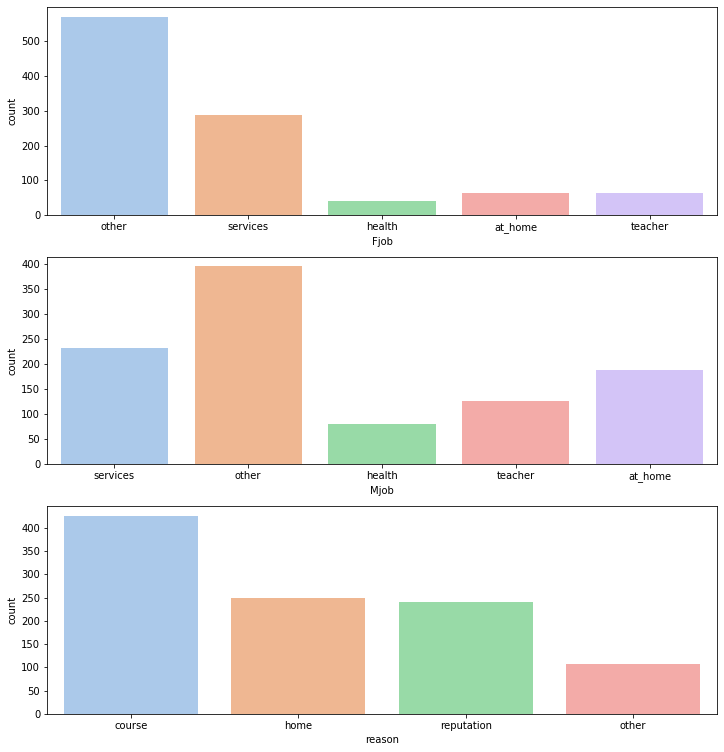

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(12, 13))

sns.countplot(x="Fjob", data=data, ax = axes[0], palette=sns.color_palette("pastel"))
sns.countplot(x="Mjob", data=data, ax = axes[1], palette=sns.color_palette("pastel"))
sns.countplot(x="reason", data=data, ax = axes[2], palette=sns.color_palette("pastel"))

plt.show()

### Так как в работе отца и матери преобладает значение other - признак ни о чем не говорит, к тому же спектр значений среди предложенных слишком мал, поэтому, скорее не следует включать эти переменные в модель. Причина выбора школы тоже, скорее, не влияет на оценки.

#### Данные параметры можно из модели убрать

In [100]:
# data[['G3', 'reason']].groupby('reason').mean()

In [14]:
data = data.drop(["Fjob", "Mjob", "reason"], axis=1)

In [111]:
# data[['G3', 'guardian']].groupby('guardian').max() # .mean();

### можно сделать 'guardian' бинарным, т.к. при father/mother 'G3' почти одинаковый, а при other - меньше

In [15]:
bin_guard = {"guardian": {"other": 0, "father": 1, "mother": 1}}
data.replace(bin_guard, inplace=True)

data[['G3', 'guardian']].groupby('guardian').max() # .mean();

,G3
guardian,
0,18
1,20


In [16]:
data[["traveltime", "address"]].corr()

,traveltime,address
traveltime,1.000000,-0.343852
address,-0.343852,1.000000


## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* При решении задачи используйте различные методы, которые рассматривались на занятиях:  
  * Линейная регрессия + регуляризации;  
  * Полиномиальная регрессия;  
  * KNN и  Radius Neighbors;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
<br>    
* Оцените качество каждой модели, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [17]:
X = data.drop(["G2", "G3"], axis=1) # с использованием G1
y = data["G3"]

In [18]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor, RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True,  random_state=17)

#### Модели сравниваются в основном по коэффициенту детерминации (explained_variance), т.к. он кажется одним из наиболее информативных для оценки качества регрессии

### Решение с признаком G1

***Модели Линейной, Гребневой и Лассо - регрессий с дефолтными параметрами***
<br><br><br>
***Linear Regression***

In [20]:
def give_scores():

    mse = mean_squared_error(y_pred, y_test)

    rmse = np.sqrt(mse)

    mae = mean_absolute_error(y_pred, y_test)

    medae = median_absolute_error(y_pred, y_test)

    R2 = r2_score(y_pred, y_test)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

In [21]:
lr = LinearRegression()

cvs = cross_val_score(lr, X, y, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.7212634  0.72980152 0.67886604 0.75522519 0.70279481 0.67726597
 0.56480495 0.58470005 0.71631916 0.64050065]


 0.6771541735676616


In [22]:
model = lr.fit(x_train, y_train)
y_pred = model.predict(x_test).astype(int)

pd.Series(sorted(model.coef_, key=abs, reverse=True), index=x_train.columns)

Subject      -1.266222
school        0.972257
age          -0.481540
address      -0.449569
Medu          0.253810
Fedu          0.248699
guardian      0.189826
traveltime    0.183061
studytime     0.105731
failures      0.100267
higher       -0.075374
internet     -0.069884
romantic      0.069746
Dalc         -0.049121
Walc          0.041431
absences      0.035538
G1           -0.031491
dtype: float64

In [23]:
give_scores()

MSE:   4.103896103896104
RMSE:  2.0258075189652405
R2:    0.6103778607771786
MAE:   1.474025974025974
MedAE: 1.0


***Ridge Regression***

In [24]:
ridge_reg = Ridge(random_state=17)

cvs = cross_val_score(ridge_reg, X, y, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.72117669 0.72985793 0.67883451 0.75518778 0.70272571 0.67734998
 0.5648542  0.58512675 0.71640461 0.64050267]


 0.6772020822624112


In [25]:
model = ridge_reg.fit(x_train, y_train)
y_pred = model.predict(x_test).astype(int)

pd.Series(sorted(model.coef_, key=abs, reverse=True), index=x_train.columns)

Subject      -1.258037
school        0.972447
age          -0.478716
address      -0.449202
Medu          0.251548
Fedu          0.243609
guardian      0.187976
traveltime    0.178738
studytime     0.105563
failures      0.100294
higher       -0.075201
internet     -0.069596
romantic      0.068938
Dalc         -0.049369
Walc          0.041306
absences      0.035419
G1           -0.031760
dtype: float64

In [26]:
give_scores()

MSE:   4.103896103896104
RMSE:  2.0258075189652405
R2:    0.6103778607771786
MAE:   1.474025974025974
MedAE: 1.0


***Lasso Regression***

In [27]:
lasso_reg = Lasso(random_state=17)

cvs = cross_val_score(lasso_reg, X, y, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.672367   0.69657932 0.65004785 0.71087766 0.655973   0.64819449
 0.53879712 0.63342041 0.6594578  0.60412886]


 0.6469843490006167


In [28]:
model = lasso_reg.fit(x_train, y_train)
y_pred = model.predict(x_test).astype(int)

pd.Series(sorted(model.coef_, key=abs, reverse=True), index=x_train.columns)

Subject       0.92419
school       -0.00000
age           0.00000
address      -0.00000
Medu          0.00000
Fedu          0.00000
guardian      0.00000
traveltime    0.00000
studytime    -0.00000
failures     -0.00000
higher       -0.00000
internet      0.00000
romantic      0.00000
Dalc         -0.00000
Walc         -0.00000
absences     -0.00000
G1            0.00000
dtype: float64

In [29]:
give_scores()

MSE:   4.402597402597403
RMSE:  2.098236736547476
R2:    0.4053986332574032
MAE:   1.5
MedAE: 1.0


***Подбор параметров для регрессий по GridSearch***

In [30]:
n_alphas = 500
alphas = np.linspace(0.001, 10, n_alphas)
lasso_cv = LassoCV(cv=5, alphas=alphas, random_state=17).fit(X, y)
alpha = lasso_cv.alpha_
print(alpha)

print(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=skf, scoring='explained_variance'))

print(abs(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=skf, scoring='explained_variance').mean()))

lasso_cv.score

0.021038076152304613
[0.72155199 0.73247815 0.67832391 0.75138457 0.70041991 0.6802924
 0.5687431  0.59841253 0.71825969 0.64490255]
0.6794768792805596


<bound method RegressorMixin.score of LassoCV(alphas=array([1.00000000e-03, 2.10380762e-02, 4.10761523e-02, 6.11142285e-02,
       8.11523046e-02, 1.01190381e-01, 1.21228457e-01, 1.41266533e-01,
       1.61304609e-01, 1.81342685e-01, 2.01380762e-01, 2.21418838e-01,
       2.41456914e-01, 2.61494990e-01, 2.81533066e-01, 3.01571142e-01,
       3.21609218e-01, 3.41647295e-01, 3.61685371e-01, 3.81723447e-01,
       4.01761523e-01, 4.21799599e-0...
       9.77958116e+00, 9.79961924e+00, 9.81965731e+00, 9.83969539e+00,
       9.85973347e+00, 9.87977154e+00, 9.89980962e+00, 9.91984770e+00,
       9.93988577e+00, 9.95992385e+00, 9.97996192e+00, 1.00000000e+01]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)>

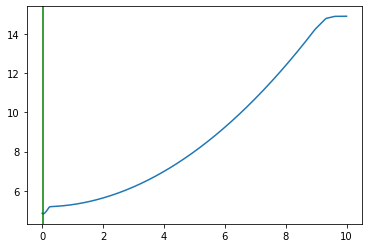

In [31]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))
plt.axvline(lasso_cv.alpha_, c='g');

In [32]:
n_alphas = 500
alphas = np.linspace(1, 1000, n_alphas)

ridge_cv = RidgeCV(alphas=alphas, cv=skf, scoring='explained_variance').fit(X, y)

print(ridge_cv.alpha_)

print(cross_val_score(Ridge(ridge_cv.alpha_), X, y, cv=skf, scoring='explained_variance'))

print(abs(cross_val_score(Ridge(ridge_cv.alpha_), X, y, cv=skf, scoring='explained_variance').mean()))

ridge_cv

31.03006012024048
[0.71859406 0.73083871 0.6776571  0.7536453  0.70053755 0.67915499
 0.56547478 0.59492637 0.71726219 0.63981072]
0.677790177391085


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([   1.        ,    3.00200401,    5.00400802,    7.00601202,
          9.00801603,   11.01002004,   13.01202405,   15.01402806,
         17.01603206,   19.01803607,   21.02004008,   23.02204409,
         25.0240481 ,   27.0260521 ,   29.02805611,   31.03006012,
         33.03206413,   35.03406814,   37.03607214,   39.03807615,
         41.04008016,   43.04208417,   45.04408818,   47.04609218,
         49.04809619,   51.0501002 ,   53.05210421,   55.05410822,
         57.05611...
        969.96993988,  971.97194389,  973.9739479 ,  975.9759519 ,
        977.97795591,  979.97995992,  981.98196393,  983.98396794,
        985.98597194,  987.98797595,  989.98997996,  991.99198397,
        993.99398798,  995.99599198,  997.99799599, 1000.        ]),
        cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
        fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='explained_variance', store_cv_values=False)

***Polynomial Regression***

In [33]:
poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
poly_model = Lasso(alpha = 0.01, random_state=17)
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_pred = poly_model.predict(poly_features.fit_transform(x_test))

In [34]:
give_scores()

MSE:   4.186991155708433
RMSE:  2.0462138587421483
R2:    0.6754383635708123
MAE:   1.5304394958189047
MedAE: 1.0919852351428299


In [35]:
poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(x_train)

# fit the transformed features to Linear Regression
poly_model = Lasso(alpha = 0.01)
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_pred = poly_model.predict(poly_features.fit_transform(x_test))

In [36]:
give_scores()

MSE:   9.759686164102003
RMSE:  3.124049641747391
R2:    0.5314144051712043
MAE:   2.0054707281491613
MedAE: 1.4036951372063022


***KNN Regression***

In [37]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

give_scores()

MSE:   3.8655844155844155
RMSE:  1.9661089531316456
R2:    0.6590268733889533
MAE:   1.4435064935064936
MedAE: 1.1999999999999993


In [38]:
cvs = cross_val_score(knn, X, y, cv=skf, scoring='explained_variance')
print(cvs)
print("\n\n", mean(cvs))

[0.73535409 0.75961347 0.61596366 0.72240534 0.74501674 0.55215618
 0.49590496 0.6338153  0.71780412 0.74125834]


 0.6719292189310718


In [39]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['manhattan', 'minkowski', 'euclidean']}
estimator = KNeighborsRegressor()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X, y)
print(model.best_estimator_)
model.best_score_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6794519154597648

In [40]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_pred, y_test)

0.6592360851404424

***DecisionTreeRegressor***

In [41]:
tree = DecisionTreeRegressor(random_state=17)
cvs = cross_val_score(tree, X, y, cv=skf, scoring='explained_variance')
print(cvs)
print("\n\n", mean(cvs))

[0.50422033 0.4837647  0.42984749 0.37729685 0.52146825 0.41057938
 0.48034907 0.47287324 0.57754153 0.60817595]


 0.4866116785485512


In [42]:
model = tree.fit(x_train, y_train)

y_pred = model.predict(x_test)

give_scores()

MSE:   7.308441558441558
RMSE:  2.7034129463405248
R2:    0.6071844806515234
MAE:   1.8344155844155845
MedAE: 1.0


In [43]:
parameters = {'max_depth': range(2, 6)}
model = GridSearchCV(tree, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X, y)
print(model.best_estimator_)
model.best_score_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=17, splitter='best')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6661858919894654

#### При подборе параметров модели лучший результат для метрики 'explained_variance' = 0.6794519154597648 достигается в моделях Lasso и KNN, но такой результат всё равно является недостаточно хорошим, возможно, такая низкая точность связана с целочисленностью данных

### Решение задачи регрессии без включения признака G1<br>

***Здесь рассматриваются отдельно оценка по математике и по португальскому***
<br><br>
***С дефолтными параметрами***

In [44]:
def give_scores(x_train, y_train, x_test, y_test, estimator):
    model = estimator.fit(x_train, y_train)
    y_pred = model.predict(x_test).astype(int)

    mse = mean_squared_error(y_pred, y_test)

    rmse = np.sqrt(mse)

    mae = mean_absolute_error(y_pred, y_test)

    medae = median_absolute_error(y_pred, y_test)

    R2 = r2_score(y_pred, y_test)

    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse, rmse, R2, mae, medae))

In [45]:
X2 = data.drop(["G2", "G1"], axis=1) # без G1

X_m = X2[X2["Subject"] == 1].drop("G3", axis=1)
X_p = X2[X2["Subject"] == 0].drop("G3", axis=1)
y_m = X2[X2["Subject"] == 1]["G3"]
y_p = X2[X2["Subject"] == 0]["G3"]

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=17)
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.3, random_state=17)

***Linear Regression***

In [46]:
lr = LinearRegression()

cvs = cross_val_score(lr, X_m, y_m, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[ 0.15565451  0.1104832  -0.12424603  0.27672301 -0.20623917  0.15211438
  0.09459474  0.13019107  0.22638914  0.06911207]


 0.08847769169180557


In [47]:
cvs = cross_val_score(lr, X_p, y_p, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.15886922 0.39727324 0.2975152  0.28854912 0.20873037 0.30297367
 0.36928157 0.26709811 0.14166222 0.39558964]


 0.28275423646776876


In [48]:
give_scores(x_train_m, y_train_m, x_test_m, y_test_m, lr)

MSE:   17.5982905982906
RMSE:  4.195031656411022
R2:    -3.8659408580431442
MAE:   3.2735042735042734
MedAE: 2.0


In [49]:
give_scores(x_train_p, y_train_p, x_test_p, y_test_p, lr)

MSE:   7.602094240837697
RMSE:  2.757189554752755
R2:    -0.7266987933804023
MAE:   2.1465968586387434
MedAE: 2.0


***Ridge Regression***

In [50]:
ridge_reg = Ridge()

cvs = cross_val_score(ridge_reg, X_m, y_m, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[ 0.15694942  0.11587071 -0.11174754  0.27739325 -0.20288392  0.15305441
  0.09781117  0.12979353  0.22474628  0.06900388]


 0.09099911745467018


In [55]:
ridge_reg = Ridge()

cvs = cross_val_score(ridge_reg, X_p, y_p, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.15992141 0.39671587 0.29802233 0.28926157 0.20897008 0.30248897
 0.36992011 0.265964   0.14392849 0.39634469]


 0.28315375231708284


In [56]:
give_scores(x_train_m, y_train_m, x_test_m, y_test_m, ridge_reg)

MSE:   17.581196581196583
RMSE:  4.192993749243681
R2:    -3.9040060314614067
MAE:   3.2564102564102564
MedAE: 2.0


In [57]:
give_scores(x_train_p, y_train_p, x_test_p, y_test_p, ridge_reg)

MSE:   7.5863874345549736
RMSE:  2.754339745665914
R2:    -0.7345354040536982
MAE:   2.141361256544503
MedAE: 2.0


***Lasso Regression***

In [61]:
lasso_reg = Lasso()

cvs = cross_val_score(lasso_reg, X_m, y_m, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.05298956 0.02966716 0.03542887 0.05180825 0.01002168 0.03919076
 0.04039434 0.0457026  0.04837942 0.01962195]


 0.03732045954296383


In [62]:
cvs = cross_val_score(lasso_reg, X_p, y_p, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[-0.00862661  0.00587196  0.0024103   0.0060796   0.00560302  0.00932197
  0.0070341   0.00060217 -0.00072397  0.00775516]


 0.003532770146423181


In [63]:
give_scores(x_train_m, y_train_m, x_test_m, y_test_m, lasso_reg)

MSE:   20.54700854700855
RMSE:  4.532880822061015
R2:    -364.2831168831168
MAE:   3.3846153846153846
MedAE: 3.0


In [64]:
give_scores(x_train_p, y_train_p, x_test_p, y_test_p, lasso_reg)

MSE:   10.534031413612565
RMSE:  3.2456172623420287
R2:    0.0
MAE:   2.5026178010471205
MedAE: 2.0


***Подбор параметров на кросс-валидации для Ridge и Lasso***

In [65]:
n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)
lasso_cv = LassoCV(cv=skf, alphas=alphas, random_state=17).fit(X, y)

cvs = cross_val_score(Lasso(lasso_cv.alpha_), X_m, y_m, cv=skf, scoring='explained_variance')
print(cvs)

print(abs(cvs).mean())

lasso_cv.alpha_

[ 0.15690153  0.12694682 -0.09510927  0.27751684 -0.19503991  0.14610562
  0.09787952  0.12959757  0.21578926  0.06135657]
0.15022429133050955


0.01

In [66]:
n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)
lasso_cv = LassoCV(cv=skf, alphas=alphas, random_state=17).fit(X, y)

cvs = cross_val_score(Lasso(lasso_cv.alpha_), X_p, y_p, cv=skf, scoring='explained_variance')
print(cvs)

print(abs(cvs).mean())

lasso_cv.alpha_

[0.15920707 0.39656184 0.30061616 0.28592214 0.21155754 0.302853
 0.3685835  0.26373631 0.15010079 0.4020125 ]
0.28411508555807935


0.01

In [67]:
n_alphas = 200
alphas = np.linspace(0.1, 1000, n_alphas)
ridge_cv = RidgeCV(cv=skf, alphas=alphas).fit(X, y)

cvs = cross_val_score(Ridge(ridge_cv.alpha_), X_m, y_m, cv=skf, scoring='explained_variance')

print(abs(cvs).mean())

ridge_cv.alpha_

0.14763607338865778


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


35.27236180904523

In [68]:
n_alphas = 200
alphas = np.linspace(0.1, 1000, n_alphas)
ridge_cv = RidgeCV(cv=skf, alphas=alphas).fit(X, y)

cvs = cross_val_score(Ridge(ridge_cv.alpha_), X_p, y_p, cv=skf, scoring='explained_variance')

print(abs(cvs).mean())

ridge_cv.alpha_

0.2844011088320939


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


35.27236180904523

***KNN Regression***

In [69]:
knn = KNeighborsRegressor()

cvs = cross_val_score(knn, X_m, y_m, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[ 0.21761667  0.45947881  0.29658825  0.19510538 -0.16348618  0.08352104
  0.33264224  0.00704855  0.28189037  0.21465784]


 0.1925062976880781


In [70]:
cvs = cross_val_score(knn, X_p, y_p, scoring = 'explained_variance', cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.06266201 0.35807345 0.21424512 0.1276872  0.21009345 0.2459635
 0.08217959 0.23692235 0.15082318 0.21340397]


 0.19020538164452078


In [76]:
give_scores(x_train_m, y_train_m, x_test_m, y_test_m, knn)

MSE:   19.5982905982906
RMSE:  4.426995662781995
R2:    -1.7057548007100207
MAE:   3.4444444444444446
MedAE: 3.0


In [77]:
give_scores(x_train_p, y_train_p, x_test_p, y_test_p, knn)

MSE:   7.68586387434555
RMSE:  2.7723390619376898
R2:    -1.0416205510572607
MAE:   2.073298429319372
MedAE: 2.0


In [78]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['manhattan', 'minkowski', 'euclidean'], 'n_neighbors': range(3, 9)}
estimator = KNeighborsRegressor()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X_m, y_m)
print(model.best_estimator_)
model.best_score_

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.2032067622482552

In [79]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['manhattan', 'minkowski', 'euclidean'], 'n_neighbors': range(3, 9)}
estimator = KNeighborsRegressor()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X_p, y_p)
print(model.best_estimator_)
model.best_score_

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.2190484213643389

***Decision Tree Regressor***

In [80]:
tree = DecisionTreeRegressor(random_state=17)
cvs = cross_val_score(tree, X_m, y_m, cv=skf, scoring='explained_variance')
print(cvs)
print("\n\n", mean(cvs))

[-0.05185521 -0.71240667 -0.79543515  0.12951846 -0.95014357 -0.91893564
 -0.74410214 -0.44316722 -0.28265776 -0.76212211]


 -0.5531307007866844


In [81]:
tree = DecisionTreeRegressor(random_state=17)
cvs = cross_val_score(tree, X_p, y_p, cv=skf, scoring='explained_variance')
print(cvs)
print("\n\n", mean(cvs))

[-0.43474414 -0.09863266 -0.82330504 -0.72344387 -0.35663799 -0.2169502
 -0.21468011 -0.52322895 -0.34638247 -0.68916887]


 -0.442717430098096


In [82]:
give_scores(x_train_m, y_train_m, x_test_m, y_test_m, tree)

MSE:   26.52991452991453
RMSE:  5.150719806970142
R2:    -0.2387962969279782
MAE:   3.8461538461538463
MedAE: 3.0


In [83]:
give_scores(x_train_p, y_train_p, x_test_p, y_test_p, tree)

MSE:   16.76439790575916
RMSE:  4.094434992249744
R2:    -0.28005475346290565
MAE:   3.0366492146596857
MedAE: 2.0


In [85]:
parameters = {'max_depth': range(2, 6)}
model = GridSearchCV(tree, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X_m, y_m)
print(model.best_estimator_)
model.best_score_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=17, splitter='best')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.19780316814128607

In [86]:
parameters = {'max_depth': range(2, 6)}
model = GridSearchCV(tree, parameters, cv=skf, scoring='explained_variance', n_jobs = -1)
model.fit(X_p, y_p)
print(model.best_estimator_)
model.best_score_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=17, splitter='best')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.22372310047291283

***Без признака G1 результаты получаются очень плохими, точность очень низкая, в некоторых моделях предсказание получается хуже константного - коэффициент детерминации отрицательный, лучшая модель по нему - Ridge Regression = 0.2844011088320939***

## Часть 3. Классификация

### Бинарная классификация
  
* Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  

* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  


* Оцените качество моделей, используйте различные подходы: confusion matrix и производные метрики, roc-кривая и roc auc. <br>Сделайте вывод о качестве решения задачи.  
  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.
  * Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.
  * Сравните между собой деревья решений, полученные на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 


In [89]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [90]:
g1 = data[data["G3"] >= 8]
g1["G3"] = 1
g0 = data[data["G3"] < 8]
g0["G3"] = 0
binary_d = pd.concat([g0, g1], ignore_index=True)

In [91]:
binary_d = binary_d.sample(frac=1).reset_index(drop=True)
binary_d

,Subject,school,age,address,Medu,Fedu,guardian,traveltime,studytime,failures,higher,internet,romantic,Dalc,Walc,absences,G1,G2,G3
0,0,0,15,1,2,2,0,1,3,0,1,1,1,1,1,0,14,14,1
1,1,1,18,1,1,3,1,1,1,1,0,1,1,2,3,7,8,7,1
2,0,0,17,0,4,4,1,1,1,0,1,0,0,1,2,6,12,11,1
3,0,0,16,1,3,3,1,1,2,0,1,1,0,2,4,4,11,11,1
4,1,0,15,1,2,3,1,1,3,0,1,1,0,1,2,4,11,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,17,1,2,2,1,1,1,0,1,1,1,1,3,2,13,12,1
1020,1,0,17,1,0,2,1,2,3,0,1,1,0,2,3,0,16,15,1
1021,1,0,15,1,4,4,1,1,2,0,1,1,0,1,2,0,10,8,1
1022,1,1,18,1,1,1,1,2,3,0,1,1,0,1,1,0,18,16,1


In [92]:
X = binary_d.drop(["G1", "G2", "G3"], axis = 1)
y = binary_d["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = 17, stratify=y)

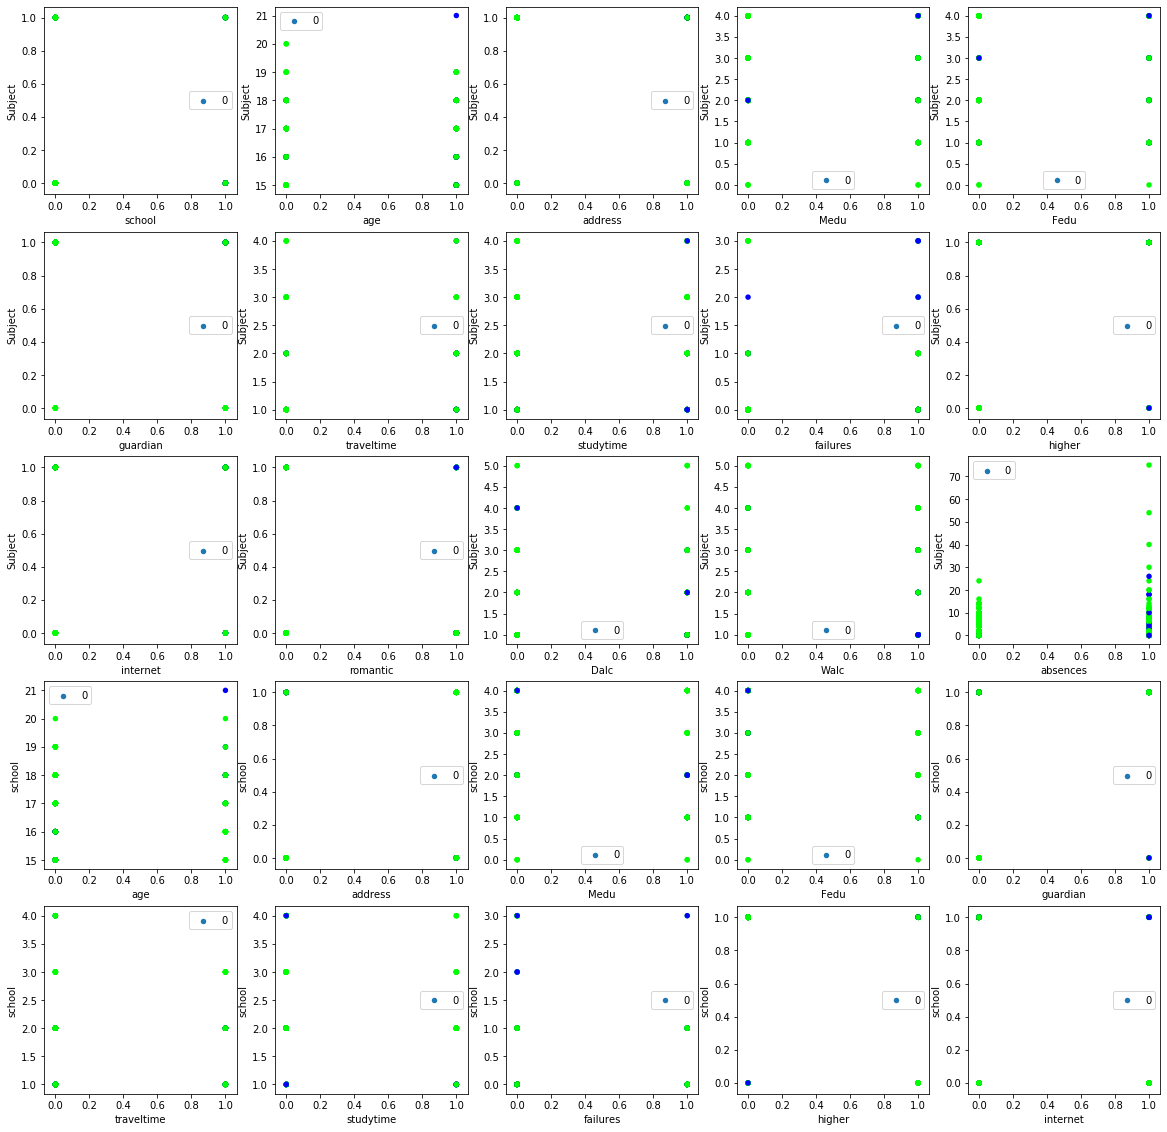

In [93]:
from itertools import combinations

fig = plt.figure(figsize=(20,20))
j = 1
for i in combinations(X.columns, 2):
    if j > 25:
        break
    plt.subplot(5, 5, j)
    plt.scatter(X_test[i[0]], X_test[i[1]], c=y_test, cmap='brg', lw=0, s=30)
    plt.xlabel(*[i[1]])
    plt.ylabel(*[i[0]])
    plt.legend(y_test)
    j += 1
plt.show()

***Logistic Regression***

In [94]:
lr = LogisticRegression(random_state=17, class_weight = "balanced")

model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_pred, y_test))

0.7077922077922078
0.5772707705553164


In [95]:
cvs = cross_val_score(lr, X, y, cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.7184466  0.66990291 0.78640777 0.76699029 0.73786408 0.69902913
 0.68627451 0.69607843 0.68316832 0.74257426]


 0.7186736292132925


In [96]:
c_values = np.linspace(1e-3, 1, 100)
penal = ['l1', 'l2']
tol = np.linspace(1e-4, 1, 8)
parameters = {'C': c_values, 'penalty': penal, 'tol': tol}
estimator = LogisticRegression(random_state=17, class_weight = 'balanced')
model = GridSearchCV(estimator, parameters, cv=skf, scoring='roc_auc', n_jobs = -1)
model.fit(X, y)
model.best_estimator_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LogisticRegression(C=0.3945454545454546, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=17, solver='warn', tol=0.8571571428571427,
                   verbose=0, warm_start=False)

In [97]:
C = model.best_params_['C']
model.best_score_

0.814767688610332

Maximal accuracy score: 0.7824675324675324
Maximal ROC-AUC score: 0.5989583333333334


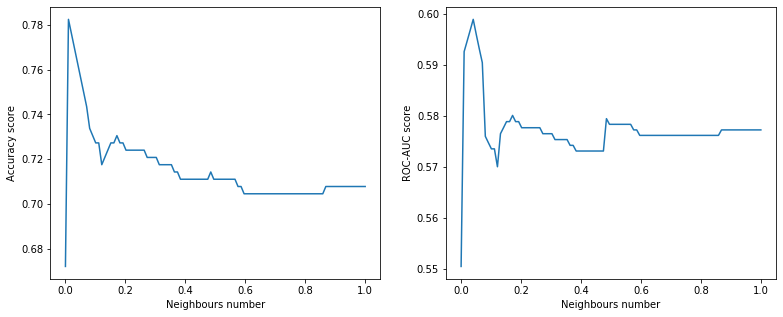

In [98]:
accur = []
roc_auc = []

for c in c_values:
    lr = LogisticRegression(random_state=17, C=c, class_weight="balanced")
    accur.append(accuracy_score(lr.fit(X_train, y_train).predict(X_test), y_test))
    roc_auc.append(roc_auc_score(lr.fit(X_train, y_train).predict(X_test), y_test))


fig = plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)    
plt.plot(c_values, accur)
plt.xlabel('Neighbours number')
plt.ylabel('Accuracy score')

plt.subplot(1, 2, 2)
plt.plot(c_values, roc_auc)
plt.xlabel('Neighbours number')
plt.ylabel('ROC-AUC score')

print(f'Maximal accuracy score: {max(accur)}')
print(f'Maximal ROC-AUC score: {max(roc_auc)}')

***KNN Classifier***

In [99]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_pred, y_test))
# roc_auc_score(y_pred, y_test)

0.9058441558441559


In [86]:
cvs = cross_val_score(knn, X, y, cv=skf, scoring = "accuracy")
print(cvs)
print("\n\n", mean(cvs))

[0.90291262 0.91262136 0.9223301  0.89320388 0.91262136 0.89320388
 0.88235294 0.90196078 0.92079208 0.92079208]


 0.9062791087789532


In [87]:
def metric_viz(metric):
    acc = []
#   roc_auc = []

    for i in range(3, 11):
        neigh = KNeighborsClassifier(n_neighbors=i, metric = metric)
        neigh.fit(X_train, y_train)
        acc.append(accuracy_score(neigh.predict(X_test), y_test))
#       roc_auc.append(roc_auc_score(neigh.predict(X_test), y_test))

    fig = plt.figure(figsize=(13, 5))

#     plt.subplot(1, 2, 1)    
    plt.plot(range(3, 11), acc, "*")
    plt.xlabel('Neighbours number')
    plt.ylabel('Accuracy score')

#     plt.subplot(1, 2, 2)
#     plt.plot(range(3, 11), roc_auc, "*")
#     plt.xlabel('Neighbours number')
#     plt.ylabel('ROC-AUC score')

    print(f'Maximal accuracy score: {max(acc)}')
#   print(f'Maximal ROC-AUC score: {max(roc_auc)}')

In [88]:
neigh = KNeighborsClassifier(n_neighbors=7, metric = 'manhattan')
cvs = cross_val_score(neigh, X, y, cv=skf, scoring = "accuracy")
print(cvs)
print("\n\n", mean(cvs))

[0.90291262 0.9223301  0.91262136 0.90291262 0.91262136 0.90291262
 0.89215686 0.90196078 0.91089109 0.91089109]


 0.9072210504888298


Maximal accuracy score: 0.9058441558441559


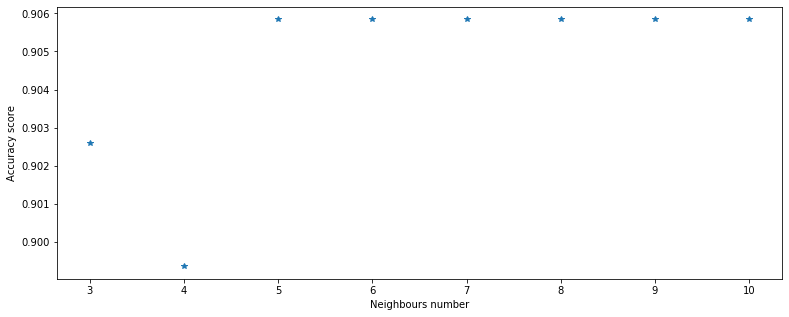

In [78]:
 metric_viz('manhattan')

In [89]:
neigh = KNeighborsClassifier(n_neighbors=8, metric = 'minkowski')
cvs = cross_val_score(neigh, X, y, cv=skf, scoring = "accuracy")
print(cvs)
print("\n\n", mean(cvs))

[0.91262136 0.91262136 0.93203883 0.90291262 0.9223301  0.89320388
 0.88235294 0.91176471 0.92079208 0.92079208]


 0.9111429960814471


Maximal accuracy score: 0.9058441558441559


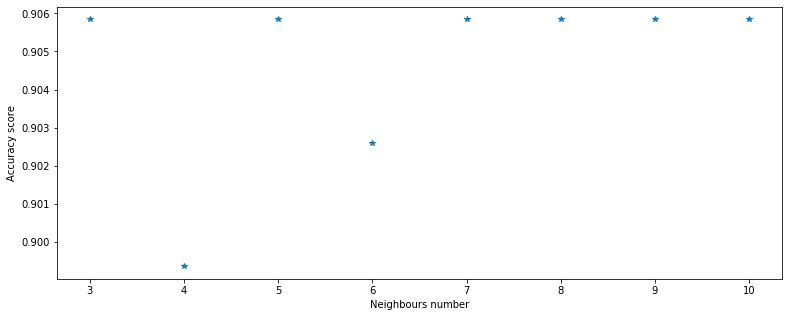

In [81]:
metric_viz('minkowski')

In [90]:
neigh = KNeighborsClassifier(n_neighbors=8, metric = 'euclidean')
cvs = cross_val_score(neigh, X, y, cv=skf, scoring = "accuracy")
print(cvs)
print("\n\n", mean(cvs))

[0.91262136 0.91262136 0.93203883 0.90291262 0.9223301  0.89320388
 0.88235294 0.91176471 0.92079208 0.92079208]


 0.9111429960814471


Maximal accuracy score: 0.9058441558441559


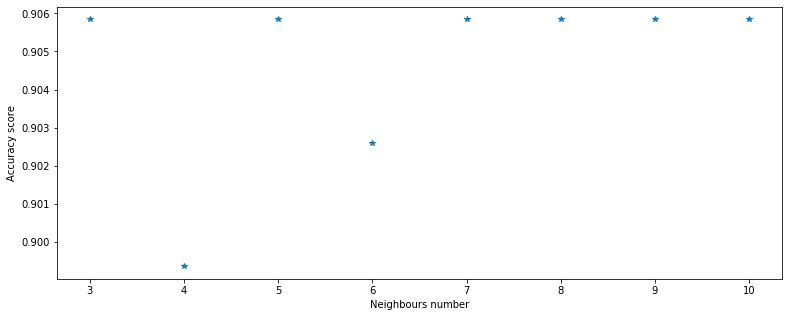

In [82]:
metric_viz('euclidean')

In [84]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'minkowski', 'manhattan'],
             'n_neighbors': range(3, 9)}
estimator = KNeighborsClassifier()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
print(model.best_estimator_)
model.best_score_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


0.912109375

***Decision Tree***

In [17]:
# !conda install python-graphviz

In [91]:
from sklearn.tree import plot_tree
from IPython.display import Image
from graphviz import Source
from sklearn import tree
from sklearn.model_selection import KFold

In [92]:
cvs = cross_val_score(DecisionTreeClassifier(random_state=17), X, y, cv=5)
print(cvs)
print("\n\n", mean(cvs))

[0.84951456 0.84878049 0.83414634 0.86764706 0.87254902]


 0.8545274941612924


In [93]:
model = DecisionTreeClassifier(max_depth = 5, random_state=17).fit(X_train, y_train)

y_pred = model.predict(X_test)
print(roc_auc_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
model

0.7111486486486487
0.9058441558441559


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

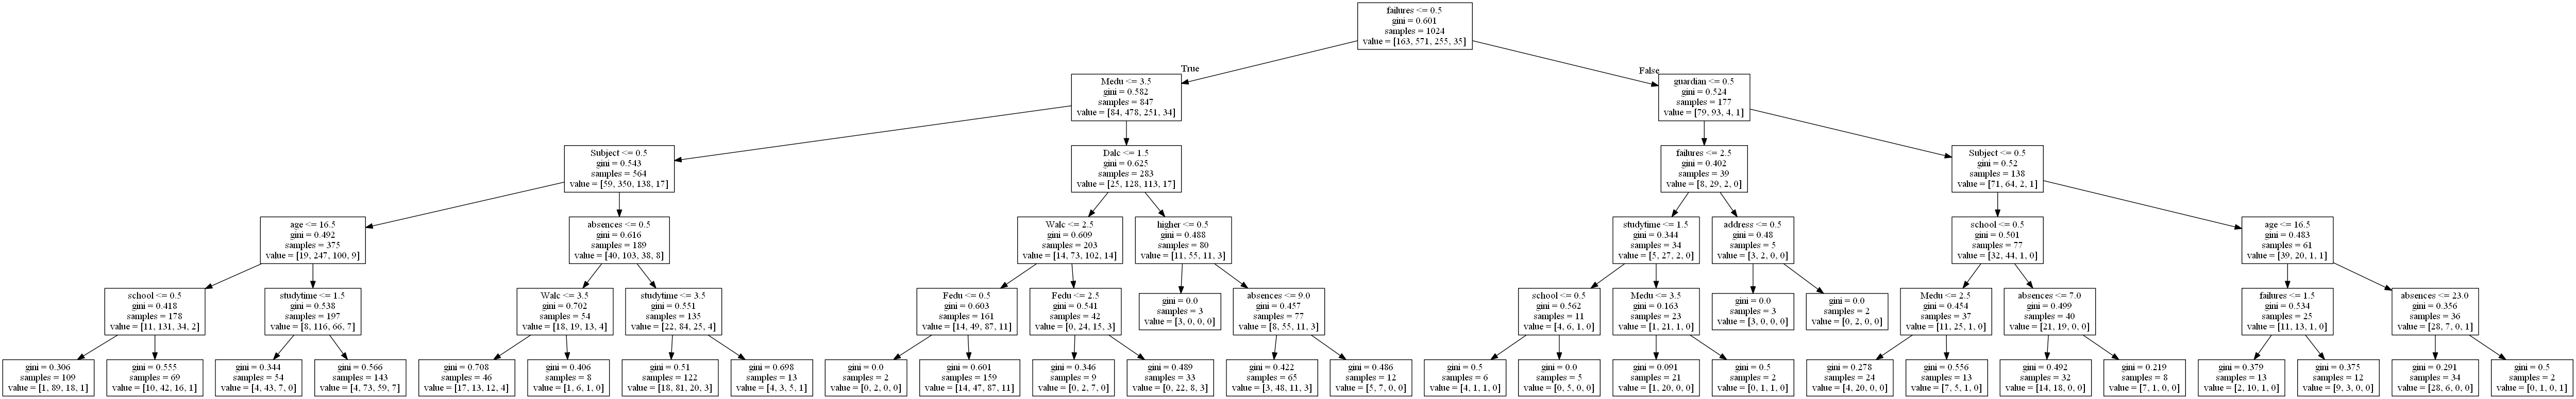

In [137]:
model = DecisionTreeClassifier(max_depth = 5, random_state=17).fit(X, y)
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=X.columns))
png = graph.pipe(format='png')
with open('dtree_pipe', 'wb') as f:
    f.write(png)

Image(png)

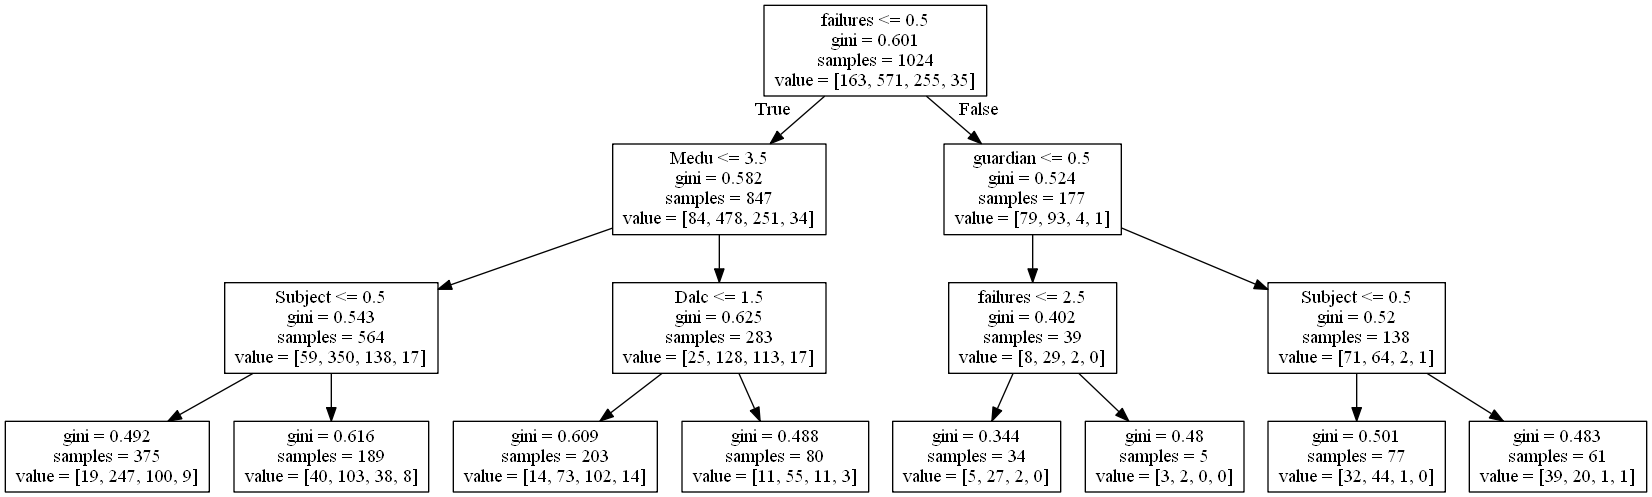

In [136]:
graph = Source(tree.export_graphviz(DecisionTreeClassifier(max_depth = 3, random_state=17).fit(X, y),
                                    out_file=None, feature_names=X.columns))
png = graph.pipe(format='png')
with open('dtree_pipe', 'wb') as f:
    f.write(png)

Image(png)

#### Описание работы алгоритма дерева:<br>
***Правило1 - деление по наличию предыдущих провалов экзаменов (<1 True)***
***Правило2 - у тех, кто проваливал - по образованию матери (<4); для не проваливавших - по опекуну (0 - не отец и не мать)***
***Правило3:***
* ***Провалы <1 - образование матери <4 - по предмету (Порт - True)***
* ***Провалы <1 - образование матери >3 - по дневной дозе алкоголя (<1 - True)***
* ***Провалов >0 - опекун = родитель - по провалам (<3 - True)***
* ***Провалов >0 - образование матери <4 - по предмету (Порт - True)***

***Лучшая модель по accuracy получается в модели KNN ~ 0.9***

### Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* При решении задачи рассмотрите различные модели:  
  * KNN и  Radius Neighbors;  
  * Логистическая регрессия;  
  * Деревья решений.  
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, сделайте вывод.  
  

* На кросс-валидации оцените, как зависит качество прогноза Дерева решений от максимальной глубины дерева. Результаты провизуализируйте, дайте содержательный комментарий.  

In [96]:
grades = []
g4 = data[data["G3"] > 17]
g4["G3"] = 3
g3 = data.loc[(data["G3"] < 18) & (data["G3"] >13)]
g3["G3"] = 2
g2 = data.loc[(data["G3"] < 14) & (data["G3"] > 8)]
g2["G3"] = 1
g1 = data[data["G3"] < 9]
g1["G3"] = 0
d_cl_4 = pd.concat([g1, g2, g3, g4], ignore_index=True)

In [97]:
d_cl_4 =  d_cl_4.sample(frac=1).reset_index(drop=True)
d_cl_4

,Subject,school,age,address,Medu,Fedu,guardian,traveltime,studytime,failures,higher,internet,romantic,Dalc,Walc,absences,G1,G2,G3
0,0,1,16,1,2,2,1,1,1,1,1,1,0,1,4,1,9,10,1
1,0,1,17,1,4,2,1,2,4,0,1,1,1,3,1,0,18,18,3
2,0,0,18,1,2,2,1,1,4,0,1,1,0,2,4,0,11,11,1
3,0,1,16,1,1,3,1,2,1,0,0,1,1,1,3,11,10,11,1
4,0,0,17,0,2,2,1,4,1,0,1,1,0,5,5,2,11,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0,16,1,4,4,1,1,2,0,1,1,0,2,4,0,13,13,2
1020,1,0,16,1,2,3,1,2,1,0,1,1,0,1,1,0,13,14,2
1021,0,0,20,0,1,1,0,2,3,0,1,1,1,1,3,8,11,15,2
1022,0,1,16,1,1,1,1,3,2,0,1,1,0,1,3,6,6,8,0


In [110]:
X = d_cl_4.drop(["G1", "G2", "G3"], axis = 1)
y = d_cl_4["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = 17, stratify=y)

***Logistic Regression***

In [111]:
lr = LogisticRegression(random_state=17, class_weight = "balanced")

model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5194805194805194


In [112]:
cvs = cross_val_score(lr, X, y, cv=skf)
print(cvs)
print("\n\n", mean(cvs))

[0.55238095 0.45192308 0.49038462 0.51456311 0.45631068 0.54455446
 0.5049505  0.4950495  0.4950495  0.48514851]


 0.49903149063439367


In [113]:
c_values = np.linspace(1e-3, 1, 100)
penal = ['l1', 'l2']
tol = np.linspace(1e-4, 1, 8)
parameters = {'C': c_values, 'penalty': penal, 'tol': tol}
estimator = LogisticRegression(random_state=17, class_weight = 'balanced')
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
model.best_estimator_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LogisticRegression(C=0.021181818181818184, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=17, solver='warn', tol=0.14294285714285712,
                   verbose=0, warm_start=False)

In [114]:
C = model.best_params_['C']
model.best_score_

0.572265625

***KNN***

In [115]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.551948051948052


In [116]:
cvs = cross_val_score(knn, X, y, cv=skf, scoring = "accuracy")
print(cvs)
print("\n\n", mean(cvs))

[0.4952381  0.5        0.625      0.5631068  0.57281553 0.56435644
 0.59405941 0.57425743 0.45544554 0.52475248]


 0.5469031712463895


Maximal accuracy score: 0.5844155844155844
Maximal accuracy score: 0.5681818181818182
Maximal accuracy score: 0.5681818181818182
Maximal accuracy score: 0.5941558441558441


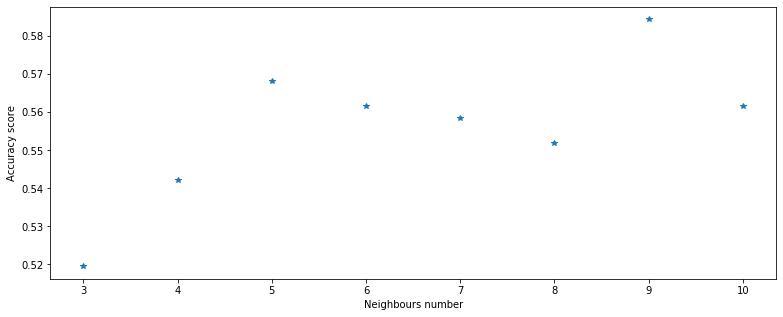

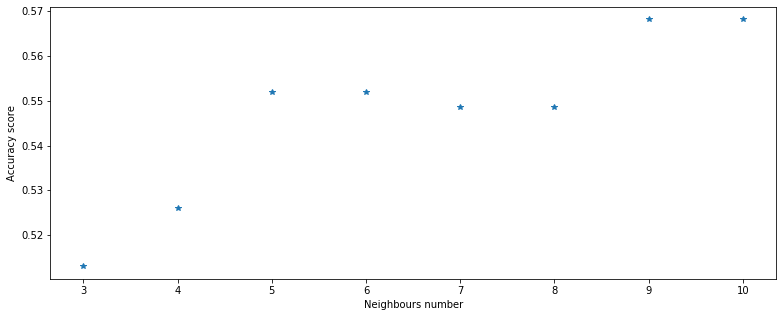

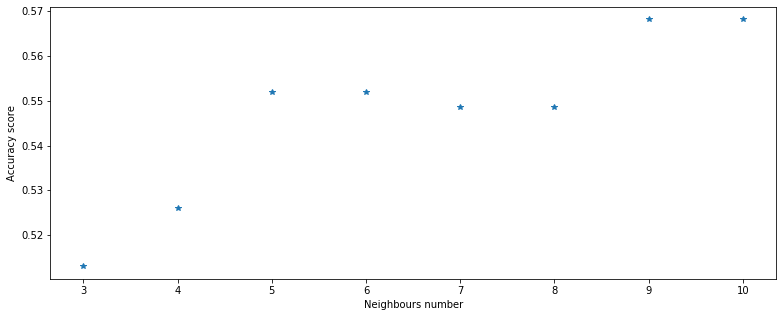

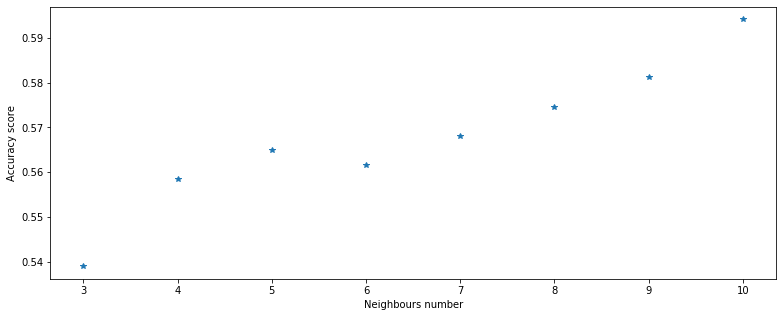

In [119]:
metric_viz('manhattan')
metric_viz('euclidean')
metric_viz('minkowski')
metric_viz('correlation')

In [123]:
parameters = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'minkowski', 'manhattan'],
             'n_neighbors': range(3, 9)}
estimator = KNeighborsClassifier()
model = GridSearchCV(estimator, parameters, cv=skf, scoring='accuracy', n_jobs = -1)
model.fit(X, y)
print(model.best_estimator_)
model.best_score_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.5869140625

***Dicision Tree***

In [124]:
cvs = cross_val_score(DecisionTreeClassifier(random_state=17), X, y, cv=5)
print(cvs)
print("\n\n", mean(cvs))

[0.51941748 0.50731707 0.44390244 0.50490196 0.46078431]


 0.48726465248661627


In [127]:
model = DecisionTreeClassifier(max_depth = 5, random_state=17).fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))
model

0.5974025974025974


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [152]:
md = range(3, 8)
parameters = {'max_depth': md}
estimator = DecisionTreeClassifier(random_state=17)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X, y)
clf.best_estimator_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [153]:
clf.best_score_

0.5830078125

Maximal accuracy score: 0.5974025974025974


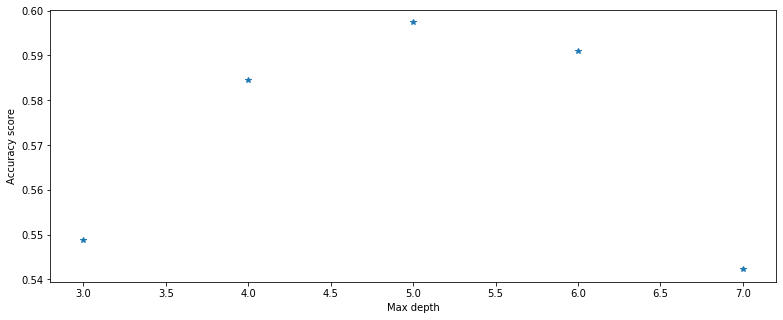

In [148]:
acc = []

for i in range(3, 8):
    estimator = DecisionTreeClassifier(random_state=17, max_depth = i).fit(X_train, y_train)
    acc.append(accuracy_score(estimator.predict(X_test), y_test))

fig = plt.figure(figsize=(13, 5))

plt.plot(range(3, 8), acc, "*")
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')

print(f'Maximal accuracy score: {max(acc)}')

***Random Forest***

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf = RandomForestClassifier(random_state=17, oob_score = True).fit(X, y)
rf.oob_score_

0.5087890625

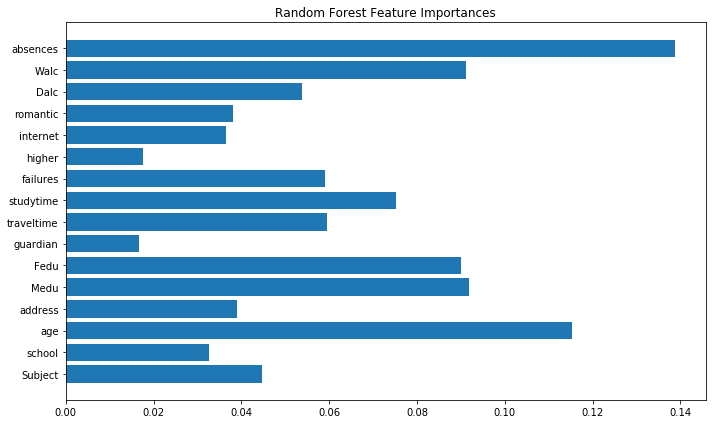

In [158]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(X.columns, rf.feature_importances_)
ax.set_yticklabels(X.columns)
ax.set_yticks(X.columns)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

In [160]:
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
md = range(3, 8)
parameters = {'n_estimators': n_estimators, 'max_depth': md}
estimator = RandomForestClassifier(random_state=17, oob_score = True)
clf = GridSearchCV(estimator, parameters, scoring='accuracy', cv=skf, n_jobs = -1)
clf.fit(X, y)
clf.best_estimator_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=17, verbose=0,
                       warm_start=False)

Maximal score: 0.6044921875


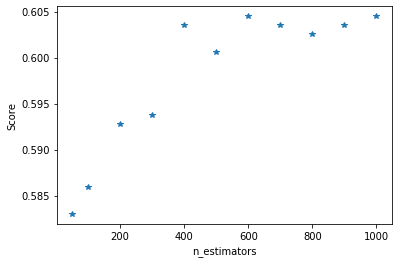

In [161]:
score = []

for n in n_estimators:
    rf = RandomForestClassifier(random_state=17, n_estimators=n, oob_score = True, max_depth=5).fit(X, y)
    score.append(rf.oob_score_)

plt.plot(n_estimators, score, "*")
plt.xlabel('n_estimators')
plt.ylabel('Score')

print(f'Maximal score: {max(score)}')

***Лучшая модель для многокласовой классификации -  Random Forest и Dicision Tree accuracy ~ 0.6*** <br>
***Но качество классификации на данном датасете всё равно низкое***